In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tv_shows = pd.read_csv('tv_shows.csv')
tv_shows

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
3,3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
4,4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5363,5363,5713,Paradise Islands,2017,NaN,NaN,10/100,0,0,0,1,1
5364,5364,5714,Mexico Untamed,2018,NaN,NaN,10/100,0,0,0,1,1
5365,5365,5715,Wild Centeral America,2020,NaN,NaN,10/100,0,0,0,1,1
5366,5366,5716,Wild Russia,2018,NaN,NaN,10/100,0,0,0,1,1


In [3]:
tv_shows.size

64416

In [4]:
tv_shows.drop_duplicates(subset='Title',
                         keep='first',inplace=True)

In [5]:
tv_shows.size

64416

In [6]:
tv_shows_long=pd.melt(tv_shows[['Title','Netflix','Hulu','Disney+',
                                'Prime Video']],id_vars=['Title'],
                      var_name='StreamingOn', value_name='Present')
tv_shows_long = tv_shows_long[tv_shows_long['Present'] == 1]
tv_shows_long.drop(columns=['Present'],inplace=True)

In [7]:
tv_shows_long


,Title,StreamingOn
0,Breaking Bad,Netflix
1,Stranger Things,Netflix
2,Attack on Titan,Netflix
3,Better Call Saul,Netflix
4,Dark,Netflix
...,...,...
21156,Breakfast with Bevan,Prime Video
21157,"Gas, Grub, and Ghosts",Prime Video
21158,Extreme Constructions,Prime Video
21159,Nature's Treasure Islands,Prime Video


In [8]:
tv_shows=tv_shows.drop(['Age'], axis = 1)
tv_shows=tv_shows.drop(['Unnamed: 0'], axis = 1)

In [9]:
tv_shows.isna().sum()

ID                   0
Title                0
Year                 0
IMDb               962
Rotten Tomatoes      0
Netflix              0
Hulu                 0
Prime Video          0
Disney+              0
Type                 0
dtype: int64

In [10]:
tv_shows

,ID,Title,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,1,Breaking Bad,2008,9.4/10,100/100,1,0,0,0,1
1,2,Stranger Things,2016,8.7/10,96/100,1,0,0,0,1
2,3,Attack on Titan,2013,9.0/10,95/100,1,1,0,0,1
3,4,Better Call Saul,2015,8.8/10,94/100,1,0,0,0,1
4,5,Dark,2017,8.8/10,93/100,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
5363,5713,Paradise Islands,2017,NaN,10/100,0,0,0,1,1
5364,5714,Mexico Untamed,2018,NaN,10/100,0,0,0,1,1
5365,5715,Wild Centeral America,2020,NaN,10/100,0,0,0,1,1
5366,5716,Wild Russia,2018,NaN,10/100,0,0,0,1,1


In [11]:
tv_shows['IMDb']=tv_shows['IMDb'].fillna(0)

In [12]:
tv_shows.dtypes

ID                  int64
Title              object
Year                int64
IMDb               object
Rotten Tomatoes    object
Netflix             int64
Hulu                int64
Prime Video         int64
Disney+             int64
Type                int64
dtype: object

In [13]:
tv_shows['nw']= tv_shows['Rotten Tomatoes'].str.split('/')

In [14]:
tv_shows

,ID,Title,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,nw
0,1,Breaking Bad,2008,9.4/10,100/100,1,0,0,0,1,"[100, 100]"
1,2,Stranger Things,2016,8.7/10,96/100,1,0,0,0,1,"[96, 100]"
2,3,Attack on Titan,2013,9.0/10,95/100,1,1,0,0,1,"[95, 100]"
3,4,Better Call Saul,2015,8.8/10,94/100,1,0,0,0,1,"[94, 100]"
4,5,Dark,2017,8.8/10,93/100,1,0,0,0,1,"[93, 100]"
...,...,...,...,...,...,...,...,...,...,...,...
5363,5713,Paradise Islands,2017,0,10/100,0,0,0,1,1,"[10, 100]"
5364,5714,Mexico Untamed,2018,0,10/100,0,0,0,1,1,"[10, 100]"
5365,5715,Wild Centeral America,2020,0,10/100,0,0,0,1,1,"[10, 100]"
5366,5716,Wild Russia,2018,0,10/100,0,0,0,1,1,"[10, 100]"


In [15]:
tv_shows['A'], tv_shows['B'] = tv_shows['Rotten Tomatoes'].str.split('/', 1).str
tv_shows

<ipython-input-15-3658a6ec4447>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  tv_shows['A'], tv_shows['B'] = tv_shows['Rotten Tomatoes'].str.split('/', 1).str


,ID,Title,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,nw,A,B
0,1,Breaking Bad,2008,9.4/10,100/100,1,0,0,0,1,"[100, 100]",100,100
1,2,Stranger Things,2016,8.7/10,96/100,1,0,0,0,1,"[96, 100]",96,100
2,3,Attack on Titan,2013,9.0/10,95/100,1,1,0,0,1,"[95, 100]",95,100
3,4,Better Call Saul,2015,8.8/10,94/100,1,0,0,0,1,"[94, 100]",94,100
4,5,Dark,2017,8.8/10,93/100,1,0,0,0,1,"[93, 100]",93,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5363,5713,Paradise Islands,2017,0,10/100,0,0,0,1,1,"[10, 100]",10,100
5364,5714,Mexico Untamed,2018,0,10/100,0,0,0,1,1,"[10, 100]",10,100
5365,5715,Wild Centeral America,2020,0,10/100,0,0,0,1,1,"[10, 100]",10,100
5366,5716,Wild Russia,2018,0,10/100,0,0,0,1,1,"[10, 100]",10,100


In [16]:
tv_shows=tv_shows.drop(['nw'], axis = 1)
tv_shows=tv_shows.drop(['B'], axis = 1)


In [17]:
tv_shows=tv_shows.drop(['Rotten Tomatoes'], axis = 1)

In [18]:
 tv_shows.rename(columns ={'A': 'Rotten_Tomamtoes'}, inplace = True)

In [19]:
tv_shows

,ID,Title,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Rotten_Tomamtoes
0,1,Breaking Bad,2008,9.4/10,1,0,0,0,1,100
1,2,Stranger Things,2016,8.7/10,1,0,0,0,1,96
2,3,Attack on Titan,2013,9.0/10,1,1,0,0,1,95
3,4,Better Call Saul,2015,8.8/10,1,0,0,0,1,94
4,5,Dark,2017,8.8/10,1,0,0,0,1,93
...,...,...,...,...,...,...,...,...,...,...
5363,5713,Paradise Islands,2017,0,0,0,0,1,1,10
5364,5714,Mexico Untamed,2018,0,0,0,0,1,1,10
5365,5715,Wild Centeral America,2020,0,0,0,0,1,1,10
5366,5716,Wild Russia,2018,0,0,0,0,1,1,10


In [20]:
tv_shows_long

,Title,StreamingOn
0,Breaking Bad,Netflix
1,Stranger Things,Netflix
2,Attack on Titan,Netflix
3,Better Call Saul,Netflix
4,Dark,Netflix
...,...,...
21156,Breakfast with Bevan,Prime Video
21157,"Gas, Grub, and Ghosts",Prime Video
21158,Extreme Constructions,Prime Video
21159,Nature's Treasure Islands,Prime Video


In [21]:
tv_shows_combined = tv_shows_long.merge(tv_shows, on = 'Title', how = 'inner')
tv_shows_combined

,Title,StreamingOn,ID,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Rotten_Tomamtoes
0,Breaking Bad,Netflix,1,2008,9.4/10,1,0,0,0,1,100
1,Stranger Things,Netflix,2,2016,8.7/10,1,0,0,0,1,96
2,Attack on Titan,Netflix,3,2013,9.0/10,1,1,0,0,1,95
3,Attack on Titan,Hulu,3,2013,9.0/10,1,1,0,0,1,95
4,Better Call Saul,Netflix,4,2015,8.8/10,1,0,0,0,1,94
...,...,...,...,...,...,...,...,...,...,...,...
5769,Breakfast with Bevan,Prime Video,5371,2013,0,0,0,1,0,1,10
5770,"Gas, Grub, and Ghosts",Prime Video,5372,2017,0,0,0,1,0,1,10
5771,Extreme Constructions,Prime Video,5373,2017,0,0,0,1,0,1,10
5772,Nature's Treasure Islands,Prime Video,5374,2014,0,0,0,1,0,1,10


In [22]:
tv_shows_combined=tv_shows_combined.drop(columns = ['Netflix','Hulu', 'Prime Video','Disney+'], axis = 1)

In [23]:
tv_shows_combined['A'], tv_shows_combined['B'] = tv_shows_combined['IMDb'].str.split('/', 1).str
tv_shows_combined=tv_shows_combined.drop(['B'], axis = 1)
tv_shows_combined=tv_shows_combined.drop(['IMDb'], axis = 1)

<ipython-input-23-60b82b2cd123>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  tv_shows_combined['A'], tv_shows_combined['B'] = tv_shows_combined['IMDb'].str.split('/', 1).str


In [24]:
tv_shows_combined.rename(columns ={'A': 'IMDB'}, inplace = True)

In [25]:
tv_shows_combined.IMDB=tv_shows_combined.IMDB.fillna(0)

In [26]:
tv_shows_combined

,Title,StreamingOn,ID,Year,Type,Rotten_Tomamtoes,IMDB
0,Breaking Bad,Netflix,1,2008,1,100,9.4
1,Stranger Things,Netflix,2,2016,1,96,8.7
2,Attack on Titan,Netflix,3,2013,1,95,9.0
3,Attack on Titan,Hulu,3,2013,1,95,9.0
4,Better Call Saul,Netflix,4,2015,1,94,8.8
...,...,...,...,...,...,...,...
5769,Breakfast with Bevan,Prime Video,5371,2013,1,10,0
5770,"Gas, Grub, and Ghosts",Prime Video,5372,2017,1,10,0
5771,Extreme Constructions,Prime Video,5373,2017,1,10,0
5772,Nature's Treasure Islands,Prime Video,5374,2014,1,10,0


In [27]:
##Now let’s plat the data where the rantings are more than 1 to see the quantity of the tv shows available on each platform:
tv_shows_combined['Rotten_Tomamtoes']= pd.to_numeric(tv_shows_combined['Rotten_Tomamtoes'])
tv_shows_combined['IMDB']= pd.to_numeric(tv_shows_combined['IMDB'])

tv_shows_plot = tv_shows_combined[(tv_shows_combined['IMDB'] > 0) & tv_shows_combined['Rotten_Tomamtoes'] > 0]


In [28]:
tv_shows_combined

,Title,StreamingOn,ID,Year,Type,Rotten_Tomamtoes,IMDB
0,Breaking Bad,Netflix,1,2008,1,100,9.4
1,Stranger Things,Netflix,2,2016,1,96,8.7
2,Attack on Titan,Netflix,3,2013,1,95,9.0
3,Attack on Titan,Hulu,3,2013,1,95,9.0
4,Better Call Saul,Netflix,4,2015,1,94,8.8
...,...,...,...,...,...,...,...
5769,Breakfast with Bevan,Prime Video,5371,2013,1,10,0.0
5770,"Gas, Grub, and Ghosts",Prime Video,5372,2017,1,10,0.0
5771,Extreme Constructions,Prime Video,5373,2017,1,10,0.0
5772,Nature's Treasure Islands,Prime Video,5374,2014,1,10,0.0


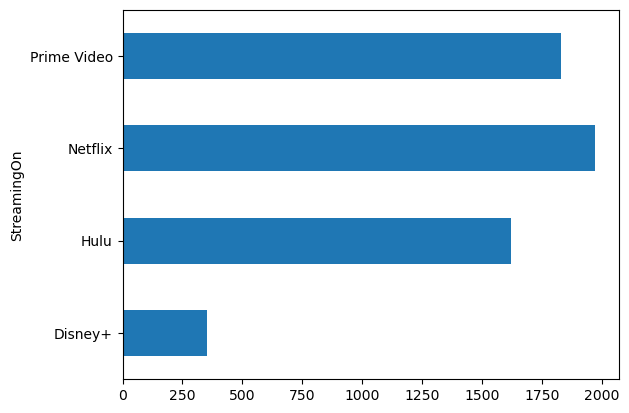

In [29]:
tv_shows_combined.groupby('StreamingOn').Title.count().plot(kind='barh')
plt.show()

In [37]:
import plotly.express as px

fig = px.violin(tv_shows_combined, x= 'StreamingOn', y="IMDB")
fig2 = px.violin(tv_shows_combined, x= 'StreamingOn', y="Rotten_Tomamtoes")
fig.update_layout(autosize=False, width=800, height=400) 
fig2.update_layout(autosize=False, width=800, height=400)        
fig.show()
fig2.show()